<a href="https://colab.research.google.com/github/JuanM-GG/maestria/blob/main/mecanisticos-lote/monod_and_inhibition_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#@title solver
def euler(f, x0, t0, tf, dt, u, *kargs):

    """
    Solve a system of differential equations using the Euler method.
    
    Parameters:
    f (function): The derivative function.
    x0 (ndarray): The initial state.
    t0 (float): The initial time.
    tf (float): The final time.
    dt (float): The time step.
    u (function): The input function.
    
    Returns:
    ndarray: The state at each time step.
    """
    t = np.arange(t0, tf, dt)
    x = np.zeros((len(t), len(x0)))
    x[0, :] = x0
    for i in range(1, len(t)):
        # print(x[i,:])
        x[i, :] = x[i-1, :] + dt * f(x[i-1, :], t[i-1], u(t[i-1]), *kargs)
    return x

In [ ]:
#@title monod model
def monod_model(y, t, u,  mu_max, yxs, ks, ypx):
    x, s, p = y 

    growth_rate = mu_max*(s/(ks + s))

    dx = growth_rate*x 
    ds = -1/yxs*growth_rate*x
    dp = ypx*growth_rate*x

    return np.array([dx, ds, dp])

In [ ]:
#@title inhibition model model
def inhibition_model(y, t, u, mu_max, yxs, ks, ypx, ki):
    x, s, p = y 

    growth_rate = mu_max*(s/(ks + s + ki*s**2))

    dx = growth_rate*x 
    ds = -1/yxs*growth_rate*x
    dp = ypx*growth_rate*x

    return np.array([dx, ds, dp])

In [ ]:
# Definir parametros 
mu_max = 1.2 # g/L
yxs = 0.2 
ks = 280 # g/L
ki = 0.3 # L/g
ypx = 4 

In [ ]:
# Definir condiciones iniciales 
x0 = np.array([0.2, 40, 0])

# Definir tiempo de integracion 
tf = 60 
dt = 1 
time = np.arange(0, tf+dt, dt)

# Simular ODEs
x, s, p = euler(monod_model, x0, 0, tf+dt, dt, lambda t: 0, mu_max, yxs, ks, ypx).T

In [ ]:
# Funcion para obtener concentraciones finales
def final_conc(x, s, p):
    return (x[-1],p[-1],s[-1])

In [ ]:
final_conc(x, s, p)

(8.188387294636055, 31.953549178544236, 0.0580635268197149)

In [ ]:
# Funcion para generar df con simulacion
def generate_data(time, x, s, p):
    predicted = {'t': [], 'x':[], 's':[], 'p':[]}
    for i in range(len(time)):

        predicted['t'].append(time[i])
        predicted['x'].append(x[i])
        predicted['s'].append(s[i])
        predicted['p'].append(p[i])

    predicted = pd.DataFrame(predicted)
    return predicted

In [ ]:
predicted = generate_data(time, x, s, p)
predicted.head()

,t,x,s,p
0,0,0.200000,40.000000,0.000000
1,1,0.230000,39.850000,0.120000
2,2,0.264387,39.678066,0.257547
3,3,0.303765,39.481174,0.415061
4,4,0.348812,39.255940,0.595248


In [ ]:
def plot_data(data):
    plt.figure(figsize=(10,5))
    plt.plot(data.t, data.x, label='x')
    plt.plot(data.t, data.s, label='s')
    plt.plot(data.t, data.p, label='p')
    plt.ylabel('Concentraciones (g/L)')
    plt.xlabel('Tiempo (h)')
    plt.grid()
    plt.legend()
    plt.show()

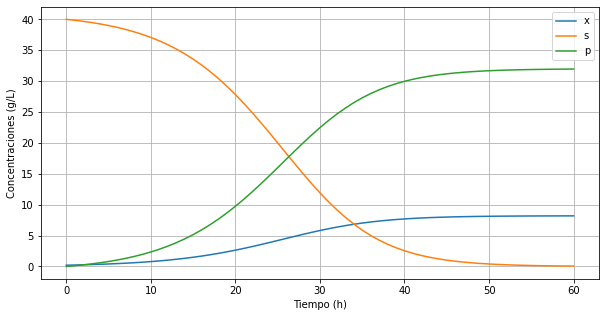

In [ ]:
plot_data(predicted)

In [ ]:
# Definir condiciones iniciales 
x0 = np.array([0.2, 40, 0])

# Definir tiempo de integracion 
tf = 60 
dt = 1 
time = np.arange(0, tf+dt, dt)

# Simular ODEs
x, s, p = euler(inhibition_model, x0, 0, tf+dt, dt, lambda t: 0, mu_max, yxs, ks, ypx, ki).T

In [ ]:
predicted = generate_data(time, x, s, p)
predicted.head()

,t,x,s,p
0,0,0.200000,40.000000,0.000000
1,1,0.212000,39.940000,0.048000
2,2,0.224725,39.876376,0.098899
3,3,0.238219,39.808907,0.152875
4,4,0.252529,39.737356,0.210115


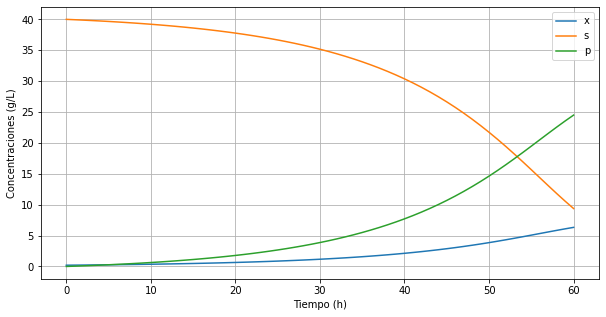

In [ ]:
plot_data(predicted)

In [ ]:
final_conc(x, s, p)

(6.3250742125495965, 24.500296850198396, 9.374628937251998)

6.639 (g/L)	25.755 (g/L)	7.807 (g/L)